<a href="https://colab.research.google.com/github/Gurupra5ad/Machine_learning_basics/blob/master/K_means_for_personality_analysis(Project-learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dataset = pd.read_csv(r'data-final.csv', sep='\t')
data = dataset.copy()
pd.options.display.max_columns = 150

In [3]:
data.drop(data.columns[50:107], axis=1, inplace=True)
data.drop(data.columns[51:], axis=1, inplace=True)

print('Number of participants: ', len(data))
data.head()
data.dropna(inplace=True)

Number of participants:  892393


In [4]:
from sklearn.preprocessing import MinMaxScaler

df = data.drop('country', axis=1)
columns = list(df.columns)

scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=columns)
df_sample = df[:5000]

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


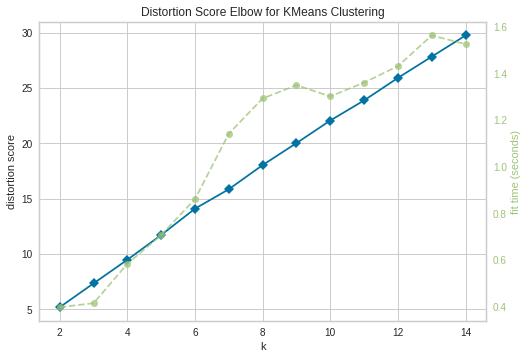

In [5]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,15))
visualizer.fit(df_sample)
visualizer.poof()

In [7]:
from sklearn.cluster import KMeans

df_rev = data.drop('country', axis=1)

kmeans = KMeans(n_clusters=5, n_jobs=-1, random_state=10)
k_fit = kmeans.fit(df_rev)

pd.options.display.max_columns = 10
predictions = k_fit.labels_
df_rev['Clusters'] = predictions
df_rev.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,...,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.0,1.0,5.0,2.0,5.0,...,5.0,3.0,4.0,5.0,1
1,3.0,5.0,3.0,4.0,3.0,...,4.0,2.0,5.0,3.0,4
2,2.0,3.0,4.0,4.0,3.0,...,5.0,3.0,4.0,4.0,4
3,2.0,2.0,2.0,3.0,4.0,...,4.0,4.0,3.0,3.0,2
4,3.0,3.0,3.0,3.0,5.0,...,5.0,3.0,5.0,5.0,1


In [8]:
df_rev.Clusters.value_counts()

pd.options.display.max_columns = 150
df_rev.groupby('Clusters').mean()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.803219,3.634569,2.227578,4.055761,2.276953,3.205624,1.737999,4.068246,2.177566,4.473633,4.245501,2.468517,4.499133,2.153037,3.558141,3.858274,3.987622,3.757480,4.010909,3.925097,2.515351,3.319303,2.614653,3.791603,2.595980,3.814122,2.755532,3.396307,3.634010,3.036681,2.805884,3.348897,3.812513,3.474564,2.097671,3.493724,3.561377,3.047178,2.772489,3.306327,3.501477,2.384426,4.061171,2.143872,3.432401,2.089607,3.681973,3.179988,4.273605,3.719303
1,3.471390,1.944288,4.339906,2.219213,4.265706,1.666625,3.888369,2.812352,3.742218,2.513208,2.319933,3.822763,3.154674,3.284531,2.115043,1.903259,2.112371,1.678348,2.120497,1.718936,1.896478,4.429828,1.833756,4.247007,1.858480,3.848515,1.588317,4.096436,4.100997,4.194408,3.715627,2.580605,4.193934,1.898715,3.138897,2.282011,3.869408,1.936919,3.574945,3.876951,3.887046,1.755078,4.085421,1.797195,4.160394,1.652301,4.317059,3.235322,4.092703,4.297995
2,2.197567,3.275693,2.794112,3.390021,2.589265,2.758231,2.129215,3.508946,2.661620,3.772127,2.334915,3.623176,2.977330,2.922377,2.318329,2.011366,2.307103,1.926275,2.580106,2.242530,3.044872,2.922056,2.597020,2.748199,3.161386,2.625977,3.008649,2.832047,2.579953,2.967354,3.126491,2.842763,3.652517,2.423135,2.352024,2.755213,3.355712,2.528151,2.744671,3.323925,3.534550,1.978839,3.612522,2.061394,3.615617,2.043475,3.878183,3.109605,3.680336,3.662550
3,3.435012,1.929410,3.781079,2.525227,4.029300,1.845237,3.636642,2.781799,3.754048,3.019995,3.811599,2.932144,4.244533,2.418261,3.290390,3.472949,3.806452,3.459275,3.664188,3.175867,2.174133,4.264843,2.666282,4.176717,2.010085,3.994178,1.867936,3.885882,4.125887,3.838151,2.956632,3.601929,3.845187,3.238496,2.236952,3.521779,3.458131,2.835747,2.936572,3.481744,3.744003,2.119645,4.249060,1.971474,3.956687,1.771799,3.967161,3.380225,4.189260,4.199105
4,2.107772,3.330385,3.083563,3.678276,2.941209,2.726839,2.190456,4.008404,2.318469,4.142493,3.466137,3.109885,4.130276,2.622076,2.803189,2.759517,2.840693,2.402434,2.951077,2.691180,1.897559,3.924326,1.695433,4.339900,2.002006,4.129825,2.030173,3.969307,4.159092,3.710358,3.823075,2.246876,4.292704,2.028934,3.222618,2.093093,4.153552,2.022386,3.807919,3.886151,3.582651,2.130410,3.896760,2.060593,3.731296,1.962994,4.017403,2.989971,4.264413,3.818168


In [9]:
col_list = list(df_rev)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

In [10]:
data_sums = pd.DataFrame()
data_sums['extroversion'] = df_rev[ext].sum(axis=1)/10
data_sums['neurotic'] = df_rev[est].sum(axis=1)/10
data_sums['agreeable'] = df_rev[agr].sum(axis=1)/10
data_sums['conscientious'] = df_rev[csn].sum(axis=1)/10
data_sums['open'] = df_rev[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
data_sums.groupby('clusters').mean()


,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,2.966115,3.646371,3.147354,3.172062,3.246782
1,3.086327,2.423035,3.209422,3.106801,3.328051
2,2.907680,2.524351,2.848751,2.910460,3.117707
3,3.073775,3.427566,3.300409,3.211317,3.354842
4,3.052787,2.977646,3.185798,3.157731,3.245466


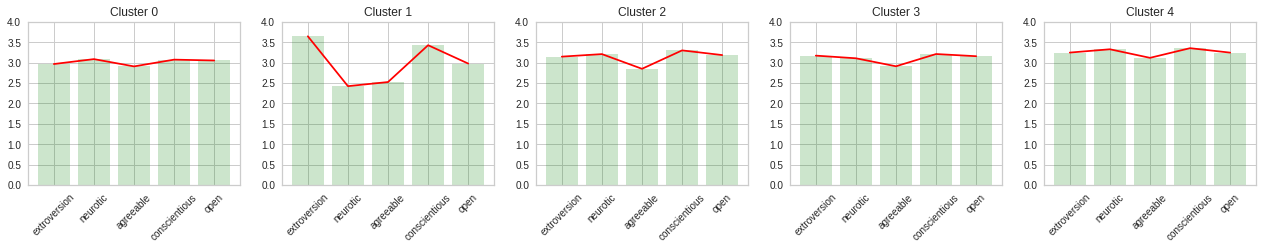

In [11]:
dataclusters = data_sums.groupby('clusters').mean()
plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(dataclusters.columns, dataclusters.iloc[:, i], color='green', alpha=0.2)
    plt.plot(dataclusters.columns, dataclusters.iloc[:, i], color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,4);

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_rev)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

,PCA1,PCA2,Clusters
0,-5.308085,-1.469900,1
1,-0.007142,3.002445,4
2,-0.849568,2.118997,4
3,1.132492,0.256604,2
4,-4.676817,2.429598,1


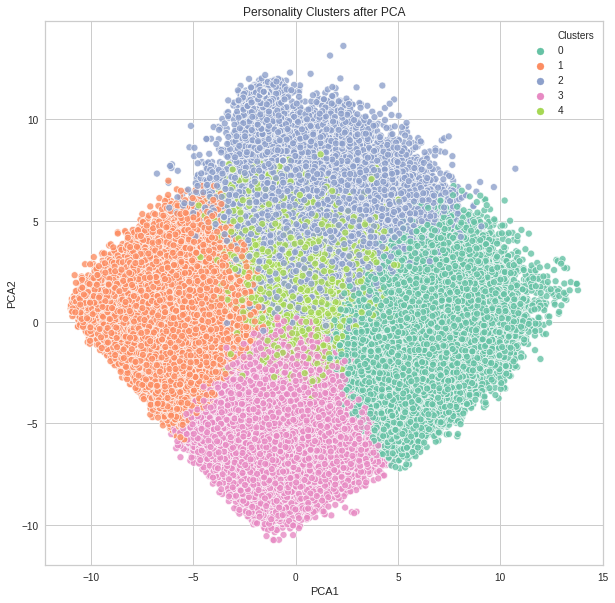

In [13]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA');

### ***FOR TEST SET***

In [14]:
test_data = pd.read_csv('test-dataset.csv', header=None)
k_predict = kmeans.predict(test_data)

In [15]:
col_list = list(test_data)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

In [16]:
test_sums = pd.DataFrame()
test_sums['extroversion'] = test_data[ext].sum(axis=1)/10
test_sums['neurotic'] = test_data[est].sum(axis=1)/10
test_sums['agreeable'] = test_data[agr].sum(axis=1)/10
test_sums['conscientious'] = test_data[csn].sum(axis=1)/10
test_sums['open'] = test_data[opn].sum(axis=1)/10
test_sums['cluster'] = k_predict
print('Sum of test question groups')
test_sums

Sum of test question groups


,extroversion,neurotic,agreeable,conscientious,open,cluster
0,3.7,2.7,2.9,2.5,3.2,2


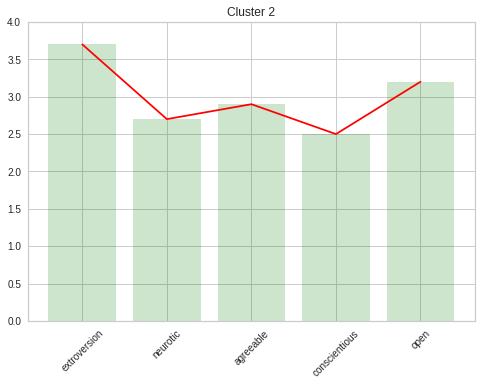

In [17]:
test_sums = test_sums.drop('cluster', axis=1)
plt.bar(test_sums.columns, test_sums.iloc[0,:], color='green', alpha=0.2)
plt.plot(test_sums.columns, test_sums.iloc[0,:], color='red')
plt.title('Cluster 2')
plt.xticks(rotation=45)
plt.ylim(0,4);